#  Model Development

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as XGB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
X = pd.read_csv("X.csv").drop(columns=["Unnamed: 0"])
# X

In [3]:
y = pd.read_csv("y.csv").drop(columns=["Unnamed: 0"])
y = y["price_in_lakhs"]

In [4]:
feature_names = X.columns
feature_names

Index(['Width', 'Reg_age', 'Length', 'Alloy Wheel Size', 'Wheel Size', 'rpm',
       'km', 'City', 'Torque', 'Top Speed', 'Mileage', 'Height', 'model',
       'Engine and Transmission', 'Transmission', 'Engine', 'Displacement'],
      dtype='object')

## a) Train-Test Split:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5959, 17), (1490, 17), (5959,), (1490,))

## b) Model Selection

## 1. Random Forest Regressor

In [6]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [7]:
rf_pred = rf.predict(X_test)
rf_pred

array([7.8904, 5.0591, 6.5061, ..., 4.2582, 4.4309, 5.4816])

In [8]:
r2_score(y_test,rf_pred)

0.8984396961892355

In [9]:
#mape

100-((abs(y_test-rf_pred)/y_test)*100).mean()

86.33624050358075

In [10]:
#mse
np.sqrt(mean_squared_error(y_test,rf_pred))

1.1821255286738241

In [11]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.055 seconds


In [12]:
importances

array([0.41781196, 0.21272941, 0.08558241, 0.04838793, 0.04936167,
       0.03073297, 0.03010479, 0.02430435, 0.01681622, 0.01631271,
       0.01576508, 0.01185436, 0.01513743, 0.00728506, 0.00585256,
       0.00587553, 0.00608558])

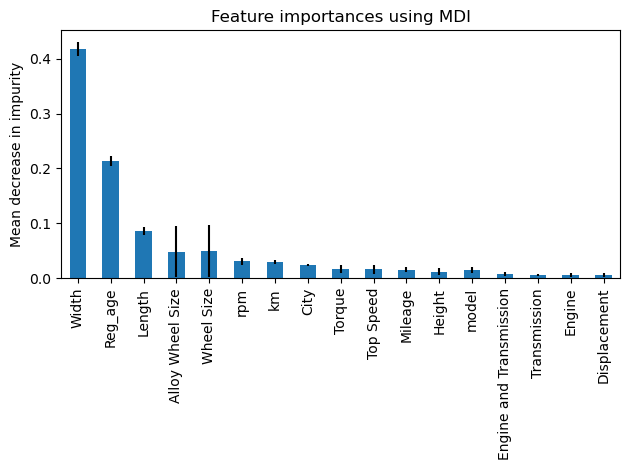

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 2. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([6.9073563 , 7.14165538, 6.86129821, ..., 3.37634314, 4.72685811,
       8.50268263])

In [15]:
r2_score(y_test,lr_pred)

0.7598981979879458

In [16]:
#mape

100-((abs(y_test-lr_pred)/y_test)*100).mean()

72.12802422204925

In [17]:
#mse
np.sqrt(mean_squared_error(y_test,lr_pred))

1.8176041698030219

## 3. Decision Trees

In [18]:
dtr = DecisionTreeRegressor()
# regr_2 = DecisionTreeRegressor(max_depth=10)

dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)
dtr_pred

array([ 8.21, 17.  ,  6.6 , ...,  4.75,  6.  ,  4.  ])

In [19]:
r2_score(y_test,dtr_pred)

0.8074271496385542

In [20]:
#mape

100-((abs(y_test-dtr_pred)/y_test)*100).mean()

82.44996322938502

In [21]:
#mse
np.sqrt(mean_squared_error(y_test,dtr_pred))

1.6277928251869316

## 4. Gradient Boosting Machines

## i) GBR

In [22]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
gb_pred

array([7.73036327, 5.61820341, 6.55581756, ..., 3.92482886, 4.02752247,
       7.30993025])

In [23]:
r2_score(y_test,gb_pred)

0.8979406692264233

In [24]:
#mape

100-((abs(y_test-gb_pred)/y_test)*100).mean()

85.25212855694585

In [25]:
#mse
np.sqrt(mean_squared_error(y_test,gb_pred))

1.1850262173095405

## ii) XGB

In [26]:
xgb = XGB.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
xgb_pred = xgb.predict(X_test)

In [28]:
r2_score(y_test,xgb_pred)

0.8958659230365571

In [29]:
#mape

100-((abs(y_test-xgb_pred)/y_test)*100).mean()

85.15937398599894

In [30]:
#mse
np.sqrt(mean_squared_error(y_test,xgb_pred))

1.1970107108845658

## d) Hyperparameter Tuning

## Linear Regression With Cross Vaidation

In [31]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.77262741, 0.75775987, 0.77639634, 0.74607448, 0.75814597])

In [32]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [33]:
lr_cv_pred = model_cv.predict(X_test)
lr_cv_pred

array([6.55905569, 7.59456124, 6.69987709, ..., 3.16771332, 5.61188367,
       8.1006758 ])

In [34]:
r2_score(y_test,lr_cv_pred)

0.7382694933617526

In [35]:
#mape

100-((abs(y_test-lr_cv_pred)/y_test)*100).mean()

71.19661959002923

## Random Forest Regressor with Cross Validation

In [36]:
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)
scores

array([0.9053078 , 0.90172778, 0.9131547 , 0.90013712, 0.8929752 ])

In [37]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rfe = RFE(rf)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [38]:
rf_cv_pred = model_cv.predict(X_test)
rf_cv_pred

array([7.8596, 5.0934, 6.3115, ..., 4.1927, 4.4069, 5.7126])

In [39]:
r2_score(y_test,rf_cv_pred)

0.90068721687038

In [40]:
#mape

100-((abs(y_test-rf_cv_pred)/y_test)*100).mean()

86.43132123614389

## Gradient Boosting with Cross Validation

In [41]:
gb = GradientBoostingRegressor()
scores = cross_val_score(gb, X_train, y_train, scoring='r2', cv=5)
scores

array([0.89196369, 0.89557978, 0.91248153, 0.89543175, 0.87840779])

In [42]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
rfe = RFE(gb)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=GradientBoostingRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [43]:
gb_cv_pred = model_cv.predict(X_test)
gb_cv_pred

array([7.69844768, 5.7419106 , 6.59982115, ..., 3.93211522, 3.99944827,
       7.33922441])

In [44]:
r2_score(y_test,gb_cv_pred)

0.8974983118762608

In [45]:
#mape

100-((abs(y_test-gb_cv_pred)/y_test)*100).mean()

85.40571207493868

## Xtreme Gradient Boosting with Cross Validation

In [46]:
xgb = XGB.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
scores = cross_val_score(xgb, X_train, y_train, scoring='r2', cv=5)
scores

array([0.89433109, 0.8966724 , 0.91420819, 0.89679025, 0.88423787])

In [47]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
# gb = GradientBoostingRegressor()
xgb.fit(X_train, y_train)
rfe = RFE(xgb)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance...
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=42, ...)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [48]:
xgb_cv_pred = model_cv.predict(X_test)
xgb_cv_pred

array([7.6790104, 5.6141844, 6.553649 , ..., 3.9757535, 4.104155 ,
       7.457876 ], dtype=float32)

In [49]:
r2_score(y_test,xgb_cv_pred)

0.896021546701388

In [50]:
#mape

100-((abs(y_test-xgb_cv_pred)/y_test)*100).mean()

85.32736893209099